In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Gaelim/Mall-Customer-Segmentation/main/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Univariate Analysis

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


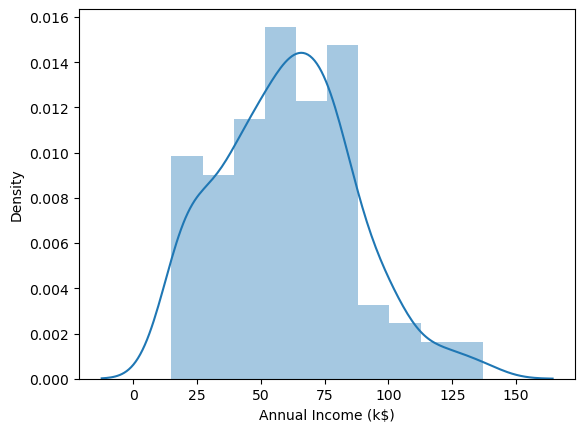

In [5]:
sns.distplot(data['Annual Income (k$)'])
plt.show()

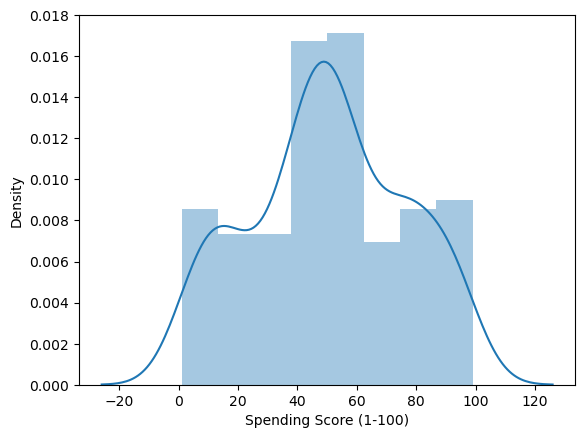

In [6]:
sns.distplot(data['Spending Score (1-100)'])
plt.show()

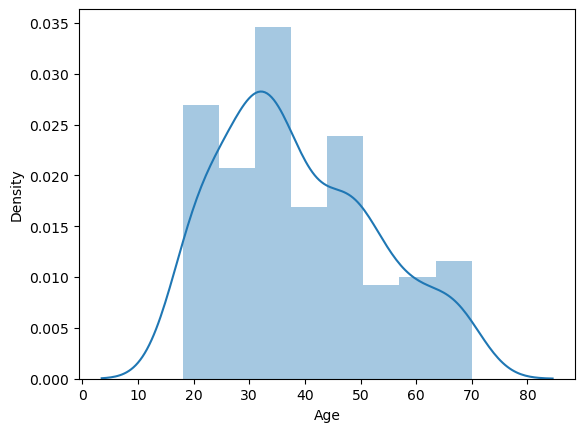

In [7]:
sns.distplot(data['Age'])
plt.show()

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

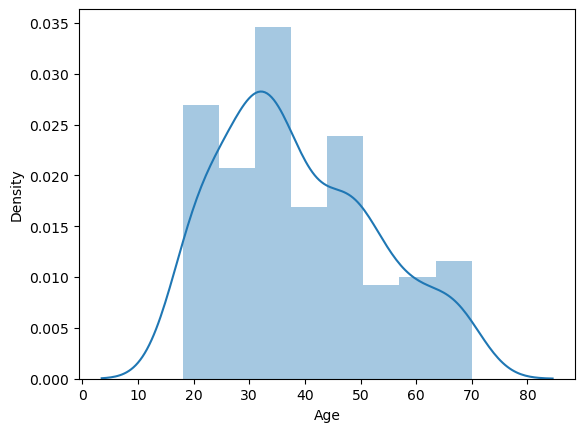

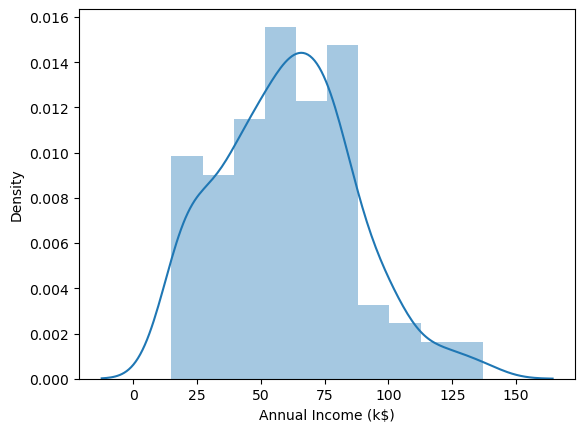

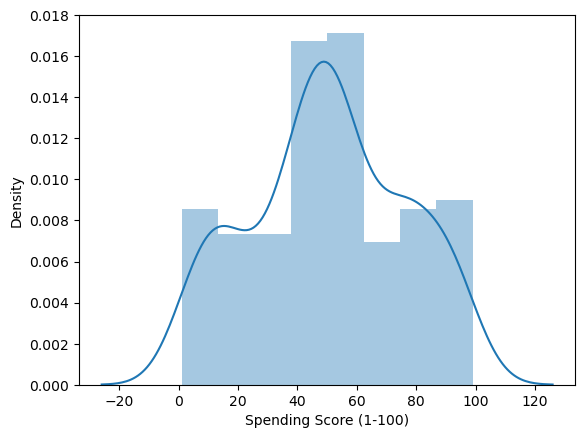

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    
    sns.distplot(data[i])
    plt.show()

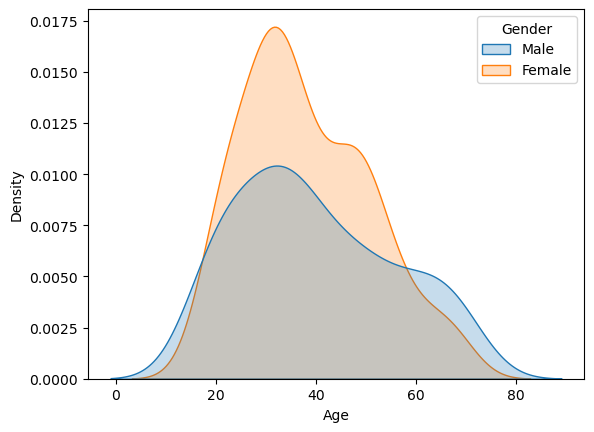

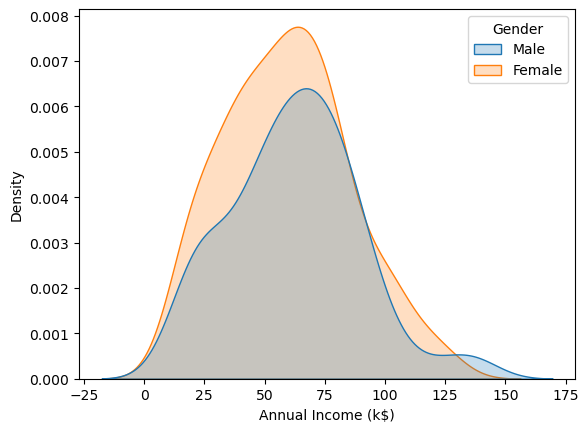

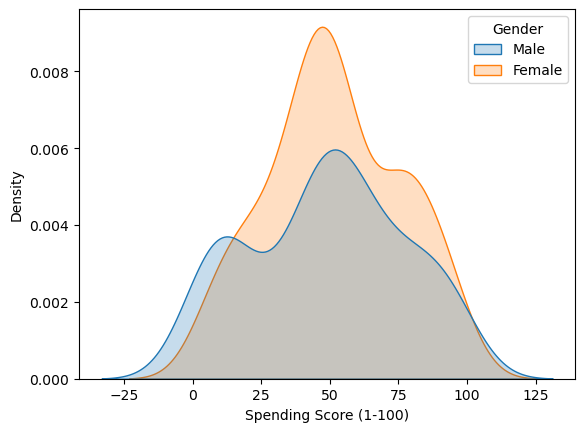

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    
    sns.kdeplot(data[i],shade = True,hue=data['Gender'])
    plt.show()

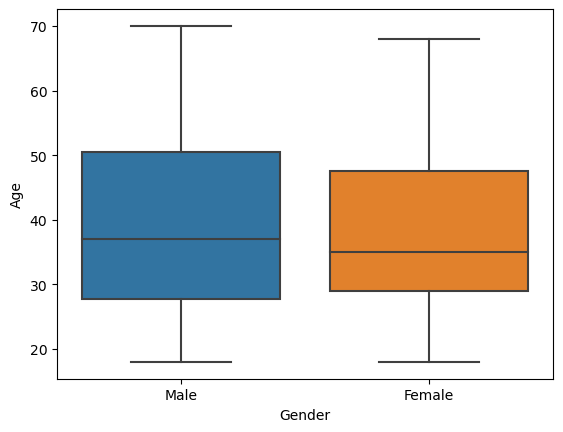

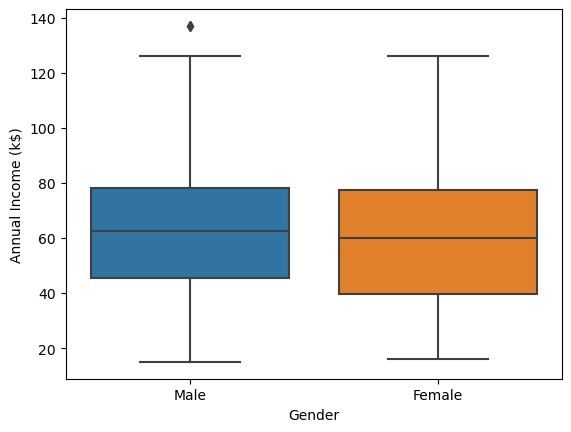

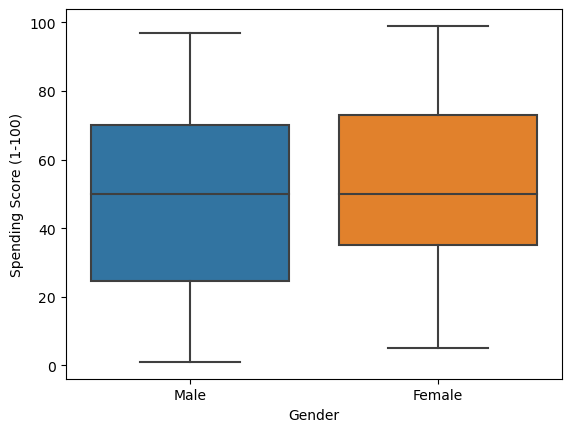

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    sns.boxplot(x='Gender',
    y=data[i],
    data=data,)
    plt.show()

In [12]:
data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

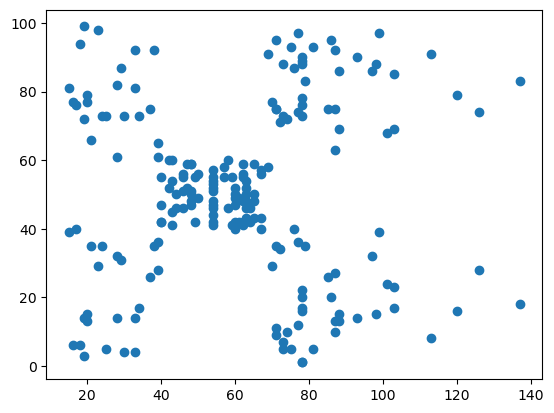

In [13]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.show()

In [14]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

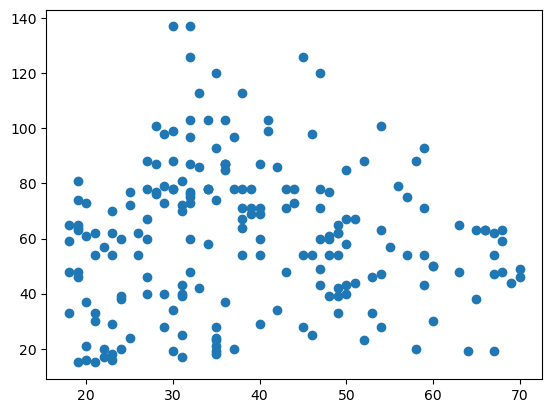

In [15]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.show()

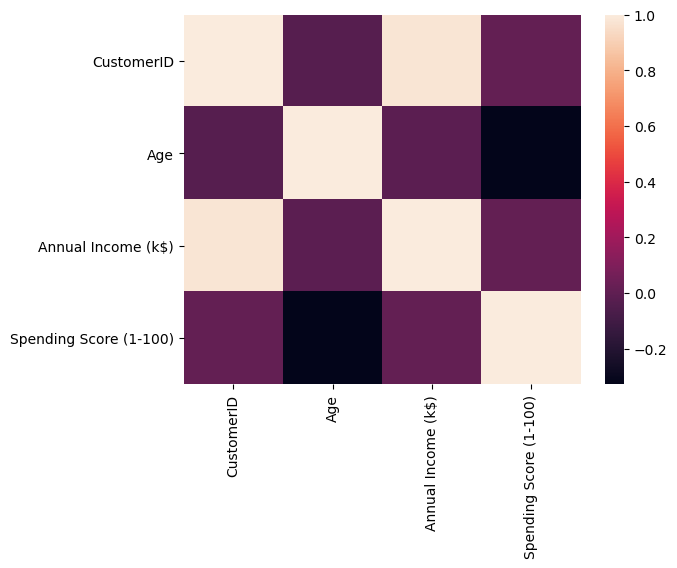

In [16]:
sns.heatmap(data.corr())
plt.show()

In [17]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
data[columns].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


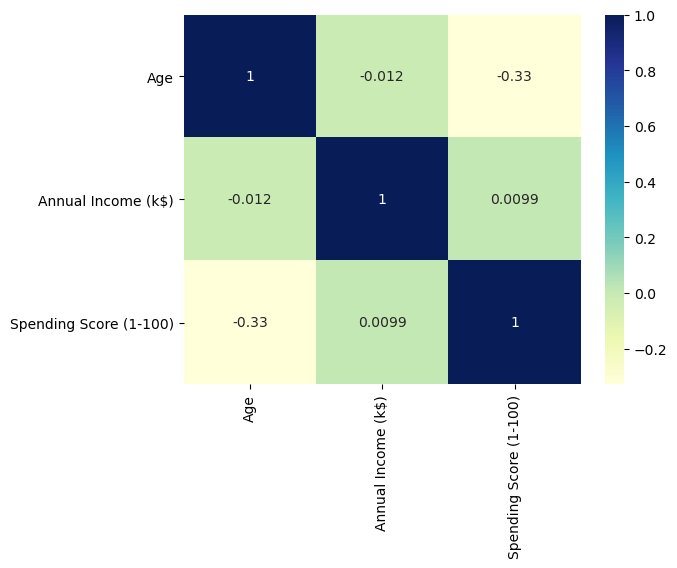

In [18]:
sns.heatmap(data[columns].corr(), cmap='YlGnBu', annot=True)
plt.show()

In [19]:
data.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Clustering - Univariate, Bivariate, Multivariate

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Annual Income (k$)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
data['Income_cluster'] = y_predicted
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


In [22]:
data['Income_cluster'].value_counts()

2    90
0    74
1    36
Name: Income_cluster, dtype: int64

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Annual Income (k$)']])
    sse.append(km.inertia_)

In [24]:
sse

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3931.9880952380995,
 2822.4996947496957,
 2234.450395682749]

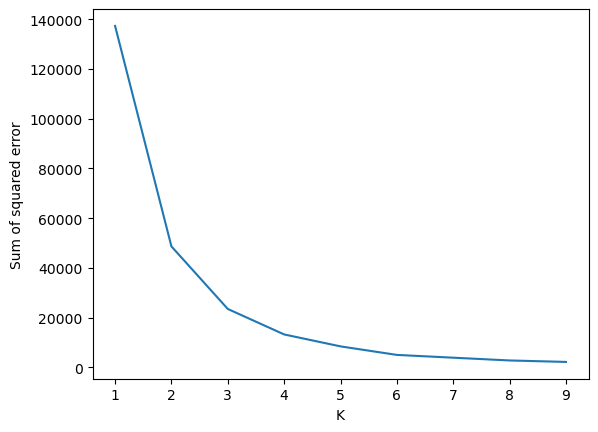

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

In [26]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income_cluster'],
      dtype='object')

In [27]:
data.groupby(['Income_cluster'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [28]:
##Bivariate Analysis

In [29]:
sse = []
k_rng2 = range(1,10)
for k in k_rng2:
    km = KMeans(n_clusters=k)
    km.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

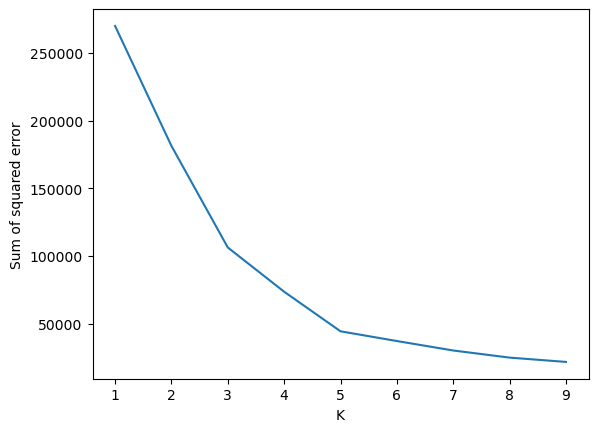

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng2,sse)
plt.show()

In [31]:
km2 = KMeans(n_clusters=5)
y_predicted2 = km2.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending_and_Income_cluster'] = y_predicted2
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending_and_Income_cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1
5,6,Female,22,17,76,0,4
6,7,Female,35,18,6,0,1
7,8,Female,23,18,94,0,4
8,9,Male,64,19,3,0,1
9,10,Female,30,19,72,0,4


In [32]:
data.groupby(['Spending_and_Income_cluster'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending_and_Income_cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


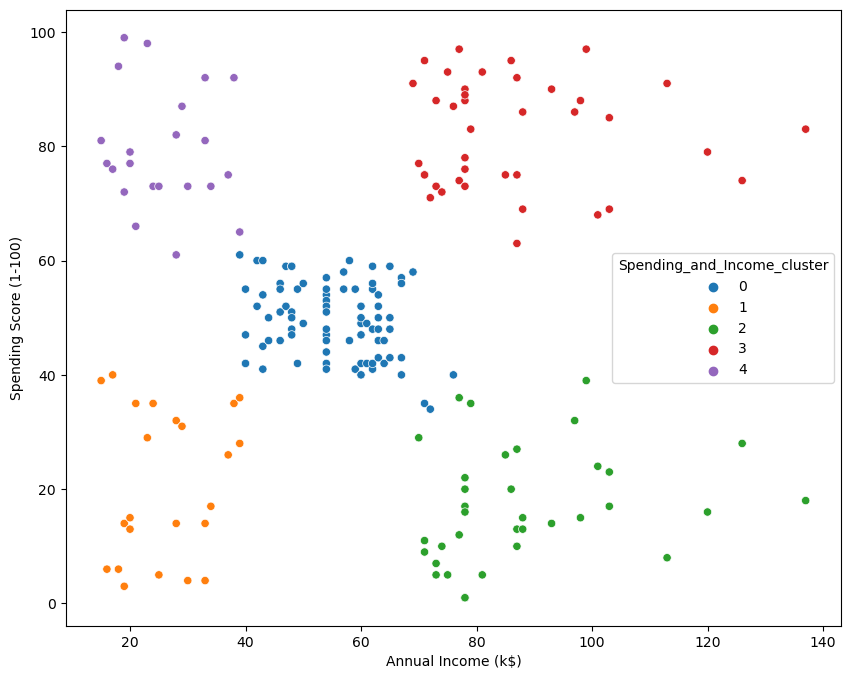

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending_and_Income_cluster',palette='tab10')
plt.show()

In [41]:
centers=pd.DataFrame(km2.cluster_centers_)
centers

,0,1
0,55.296296,49.518519
1,26.304348,20.913043
2,88.200000,17.114286
3,86.538462,82.128205
4,25.727273,79.363636


In [44]:
centers.columns=['x','y']

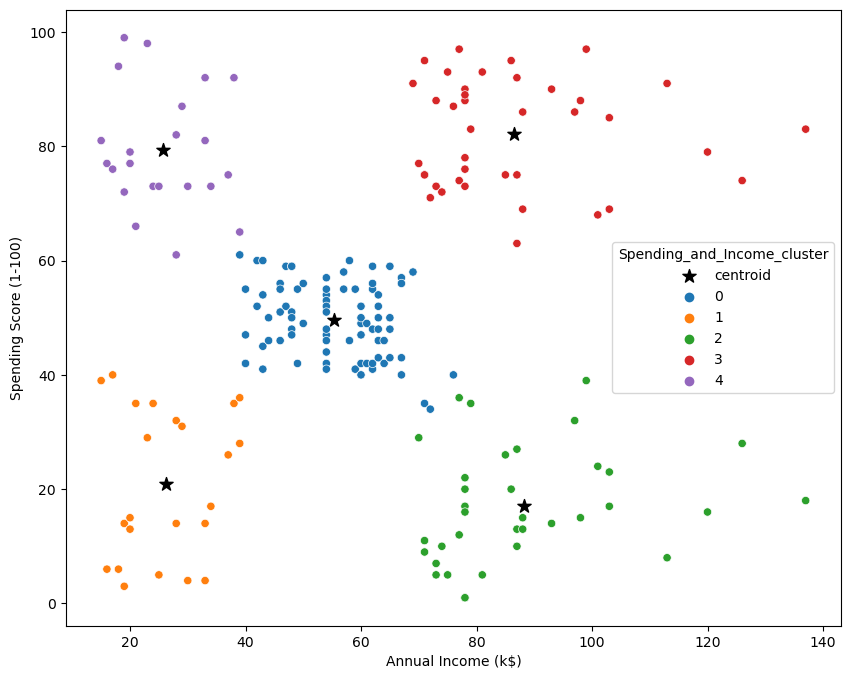

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black',marker='*',label='centroid')
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending_and_Income_cluster',palette='tab10')
plt.show()

# multivariate clustering

In [47]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [53]:
df = pd.get_dummies(data, drop_first = True)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending_and_Income_cluster,Gender_Male
0,1,19,15,39,0,1,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,1,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,1,0
...,...,...,...,...,...,...,...
195,196,35,120,79,1,3,0
196,197,45,126,28,1,2,0
197,198,32,126,74,1,3,1
198,199,32,137,18,1,2,1


In [54]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster', 'Spending_and_Income_cluster', 'Gender_Male'],
      dtype='object')

In [57]:
dff = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [58]:
dff = scale.fit_transform(dff)

In [61]:
dff = pd.DataFrame(dff)
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [62]:
sse = []
k_rng3 = range(1,10)
for k in k_rng3:
    km1 = KMeans(n_clusters=k)
    km1.fit(dff)
    sse.append(km1.inertia_)

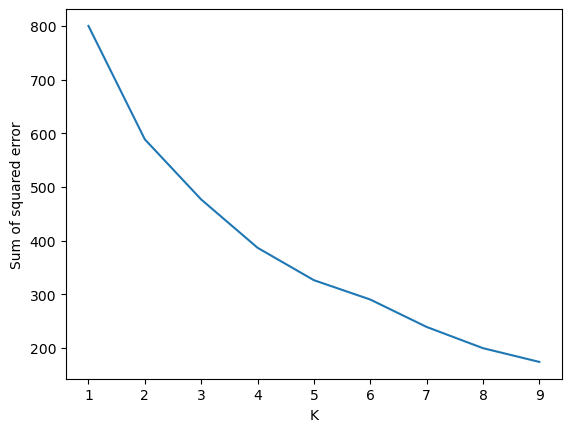

In [63]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng3,sse)
plt.show()